## Problem Statement

We all know that when we visit an e-commerce or TV series website or even YouTube we see a separate suggestion box, where in they show some content which you might like. These are mainly based on the content that you have consumed on their website previously. These are called as *Recommendation Engine*. 

Now consider you have been running a start up since last one year and now you have been able to gather some customer data and you want to build a recommendation engine. *Based on certain features you have to cluster the customers into two different groups so that you can recommend the correct products based on the customer’s cluster*.

<img src = 'data_desc.png'>

### Evaluation Criteria

* Please note the evaluation metric for score generation will be macro precision-score
        score = precision_score(actual_values, predicted_values, average = 'macro')

* Evaluation metric for the source code & presentation submitted is as follows:

    i. Approach: How well is the problem statement understood and attended to?

    ii. Creativity: Depth of Analysis

    iii. Visualisations: What features are being presented and how?

Total Score (10+10+10 = 30)

# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [3]:
train_df.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,csid_1,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,0
1,csid_2,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,0
2,csid_3,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,0
3,csid_4,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,0
4,csid_5,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,0


In [4]:
test_df.head()

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,csid_10739,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,csid_10740,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,csid_10741,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,csid_10742,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,csid_10743,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


In [5]:
continuous_var = ['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score']
cat_var = ['customer_active_segment', 'X1']
target = ['customer_category']

In [6]:
train_df.isna().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       42
customer_ctr_score                   0
customer_stay_score                 37
customer_frequency_score             0
customer_product_variation_score    46
customer_order_score                66
customer_affinity_score              0
customer_active_segment             23
X1                                  37
customer_category                    0
dtype: int64

In [7]:
test_df.isna().sum()

customer_id                          0
customer_visit_score                 0
customer_product_search_score       29
customer_ctr_score                   0
customer_stay_score                 16
customer_frequency_score             0
customer_product_variation_score    43
customer_order_score                41
customer_affinity_score              0
customer_active_segment             12
X1                                  25
dtype: int64

In [8]:
train_df.shape

(10738, 12)

### Dealing with NaN values

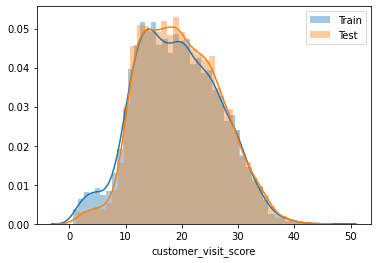

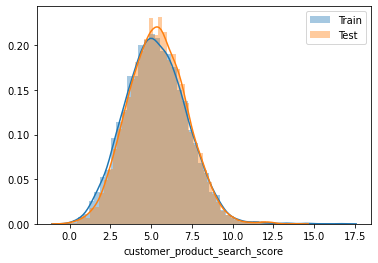

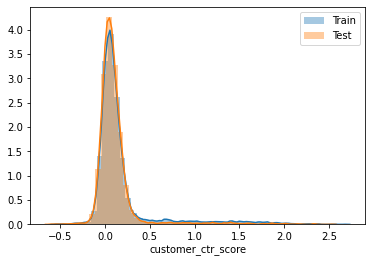

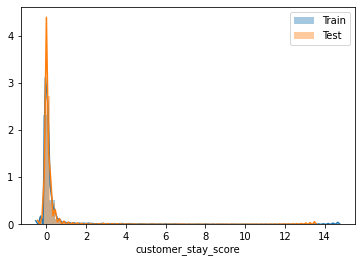

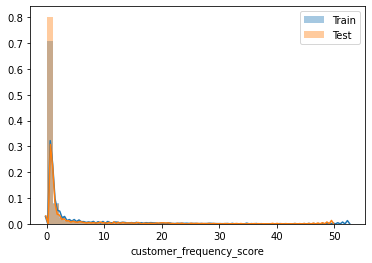

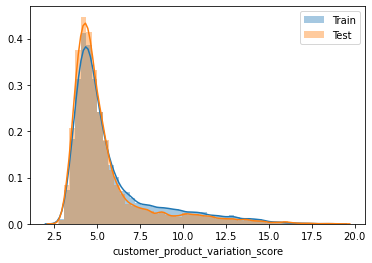

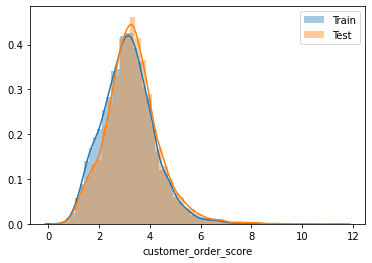

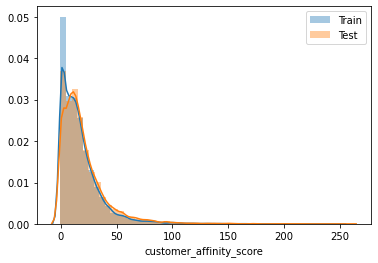

In [9]:
for i in continuous_var:
    nm = str('Dist plot of '+ i)
    sns.distplot(train_df[i],label = 'Train')
    sns.distplot(test_df[i],label = 'Test')
    plt.legend()
    plt.savefig(str('Figure/'+nm))
    plt.show()

In [10]:
#customer_product_search_score

train_df['customer_product_search_score'].fillna(train_df['customer_product_search_score'].mean(),inplace = True)
test_df['customer_product_search_score'].fillna(test_df['customer_product_search_score'].mean(),inplace = True)

#customer_stay_score (Data seems skwed, median is a better fit)

train_df['customer_stay_score'].fillna(train_df['customer_stay_score'].median(),inplace = True)
test_df['customer_stay_score'].fillna(test_df['customer_stay_score'].median(),inplace = True)

#customer_product_variation_score (Data seems skwed, median is a better fit)

train_df['customer_product_variation_score'].fillna(train_df['customer_product_variation_score'].median(),inplace = True)
test_df['customer_product_variation_score'].fillna(test_df['customer_product_variation_score'].median(),inplace = True)

#customer_order_score

train_df['customer_order_score'].fillna(train_df['customer_order_score'].mean(),inplace = True)
test_df['customer_order_score'].fillna(test_df['customer_order_score'].mean(),inplace = True)

In [11]:
for i in cat_var:
    print(i, train_df[i].nunique())
    print(train_df[i].value_counts())

customer_active_segment 5
C     4919
B     4430
D      536
AA     418
A      412
Name: customer_active_segment, dtype: int64
X1 5
BA    4511
A     2268
F     2235
AA    1611
E       76
Name: X1, dtype: int64


In [12]:
#customer_active_segment (Replacing with Mode)

train_df['customer_active_segment'].fillna('C',inplace = True)
test_df['customer_active_segment'].fillna('C',inplace = True)

#X1 (Replacing with Mode)

x = train_df['X1'].mode()
train_df['X1'].fillna('BA',inplace = True)
test_df['X1'].fillna('BA',inplace = True)

In [13]:
#Check for Duplicate Data : Train
train_df[train_df.duplicated()]

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category


In [14]:
#Check for Duplicate Data : Test
test_df[test_df.duplicated()]

,customer_id,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1


In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       10738 non-null  object 
 1   customer_visit_score              10738 non-null  float64
 2   customer_product_search_score     10738 non-null  float64
 3   customer_ctr_score                10738 non-null  float64
 4   customer_stay_score               10738 non-null  float64
 5   customer_frequency_score          10738 non-null  float64
 6   customer_product_variation_score  10738 non-null  float64
 7   customer_order_score              10738 non-null  float64
 8   customer_affinity_score           10738 non-null  float64
 9   customer_active_segment           10738 non-null  object 
 10  X1                                10738 non-null  object 
 11  customer_category                 10738 non-null  int64  
dtypes: f

In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       7160 non-null   object 
 1   customer_visit_score              7160 non-null   float64
 2   customer_product_search_score     7160 non-null   float64
 3   customer_ctr_score                7160 non-null   float64
 4   customer_stay_score               7160 non-null   float64
 5   customer_frequency_score          7160 non-null   float64
 6   customer_product_variation_score  7160 non-null   float64
 7   customer_order_score              7160 non-null   float64
 8   customer_affinity_score           7160 non-null   float64
 9   customer_active_segment           7160 non-null   object 
 10  X1                                7160 non-null   object 
dtypes: float64(8), object(3)
memory usage: 615.4+ KB


In [17]:
print(train_df['customer_category'].nunique())
print(train_df['customer_category'].value_counts())

2
0    9443
1    1295
Name: customer_category, dtype: int64


In [18]:
#customer_active_segment is a str column

train_df['customer_active_segment'] = train_df['customer_active_segment'].astype('str')
test_df['customer_active_segment'] = test_df['customer_active_segment'].astype('str')

#X1 is a str column

train_df['X1'] = train_df['X1'].astype('str')
test_df['X1'] = test_df['X1'].astype('str')

#customer_category is a bool column

train_df['customer_category'] = train_df['customer_category'].astype('bool')

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       10738 non-null  object 
 1   customer_visit_score              10738 non-null  float64
 2   customer_product_search_score     10738 non-null  float64
 3   customer_ctr_score                10738 non-null  float64
 4   customer_stay_score               10738 non-null  float64
 5   customer_frequency_score          10738 non-null  float64
 6   customer_product_variation_score  10738 non-null  float64
 7   customer_order_score              10738 non-null  float64
 8   customer_affinity_score           10738 non-null  float64
 9   customer_active_segment           10738 non-null  object 
 10  X1                                10738 non-null  object 
 11  customer_category                 10738 non-null  bool   
dtypes: b

In [20]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_id                       7160 non-null   object 
 1   customer_visit_score              7160 non-null   float64
 2   customer_product_search_score     7160 non-null   float64
 3   customer_ctr_score                7160 non-null   float64
 4   customer_stay_score               7160 non-null   float64
 5   customer_frequency_score          7160 non-null   float64
 6   customer_product_variation_score  7160 non-null   float64
 7   customer_order_score              7160 non-null   float64
 8   customer_affinity_score           7160 non-null   float64
 9   customer_active_segment           7160 non-null   object 
 10  X1                                7160 non-null   object 
dtypes: float64(8), object(3)
memory usage: 615.4+ KB


In [21]:
#Drop customer_id 

solution_df = test_df[['customer_id']]
train_df.drop('customer_id', axis = 1, inplace = True)
test_df.drop('customer_id', axis = 1, inplace = True)

In [22]:
train_df.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1,customer_category
0,13.168425,9.447662,-0.070203,-0.139541,0.436956,4.705761,2.537985,7.959503,C,F,False
1,17.092979,7.329056,0.153298,-0.102726,0.380340,4.205138,4.193444,17.517381,C,A,False
2,17.505334,5.143676,0.106709,0.262834,0.417648,4.479070,3.878971,12.595155,C,BA,False
3,31.423381,4.917740,-0.020226,-0.100526,0.778130,5.055535,2.708940,4.795073,AA,F,False
4,11.909502,4.237073,0.187178,0.172891,0.162067,3.445247,3.677360,56.636326,C,AA,False


In [23]:
test_df.head()

,customer_visit_score,customer_product_search_score,customer_ctr_score,customer_stay_score,customer_frequency_score,customer_product_variation_score,customer_order_score,customer_affinity_score,customer_active_segment,X1
0,22.500174,3.702145,0.118811,0.093253,0.689237,5.786842,3.748009,7.661716,B,BA
1,13.225950,3.600102,0.130985,0.053575,0.142756,3.940359,3.469659,33.999679,B,AA
2,14.603376,5.084047,-0.004651,-0.036299,0.333709,4.254662,3.855939,33.485630,B,AA
3,26.149905,3.025501,0.229740,0.204591,3.768405,6.942625,2.362421,0.795372,B,BA
4,19.810630,5.020400,-0.011347,-0.028780,0.286841,4.585513,3.278624,15.052058,C,BA


# Exploratory Data Analysis

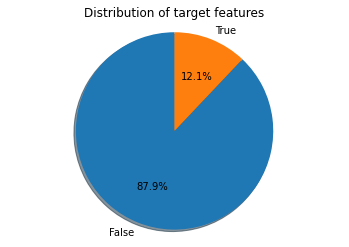

In [24]:
# Pie chart

fig1, ax1 = plt.subplots()
ax1.pie(list(train_df.customer_category.value_counts()), labels=['False','True'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of target features')
plt.savefig('Figure/pie.png')
plt.show()

Clearly an imbalance target variables.

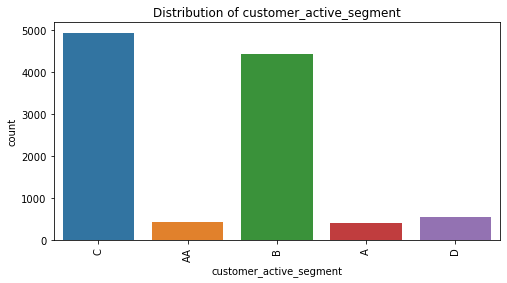

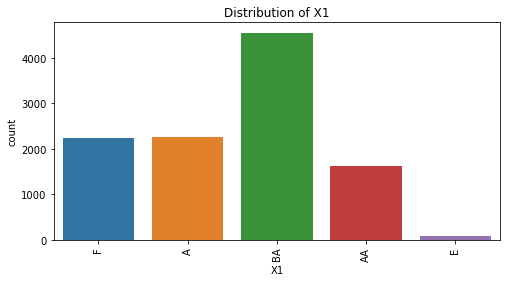

In [25]:
#Plot for Categoric Variable

for i in cat_var:
    plt.figure(figsize=(8,4))
    nm = str('Distribution of '+i)
    plt.title(nm)     
    sns.countplot(data = train_df, x = i)
    plt.xticks(rotation=90)
    plt.title(nm)
    plt.savefig(str('Figure/'+nm))
    plt.show()

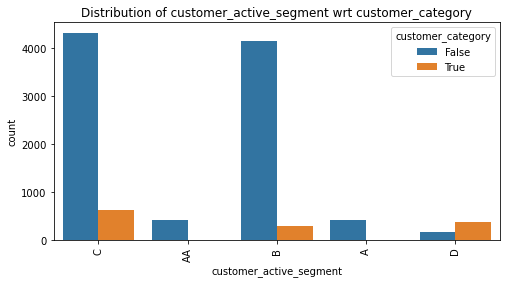

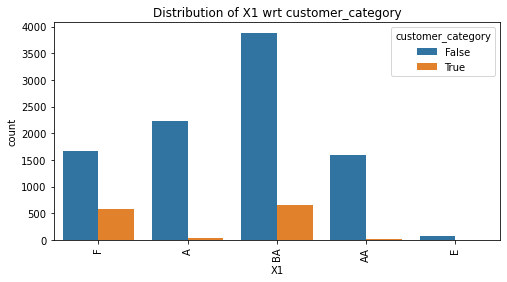

In [26]:
#Plot categorical data wrt 'customer_category'
for i in cat_var:
    plt.figure(figsize=(8,4))
    nm = str('Distribution of '+i+' wrt customer_category')
    sns.countplot(data = train_df,hue = 'customer_category', x = i)
    plt.xticks(rotation=90)
    plt.title(nm)
    plt.savefig(str('Figure/'+nm))
    plt.show()

### Dealing with outliers

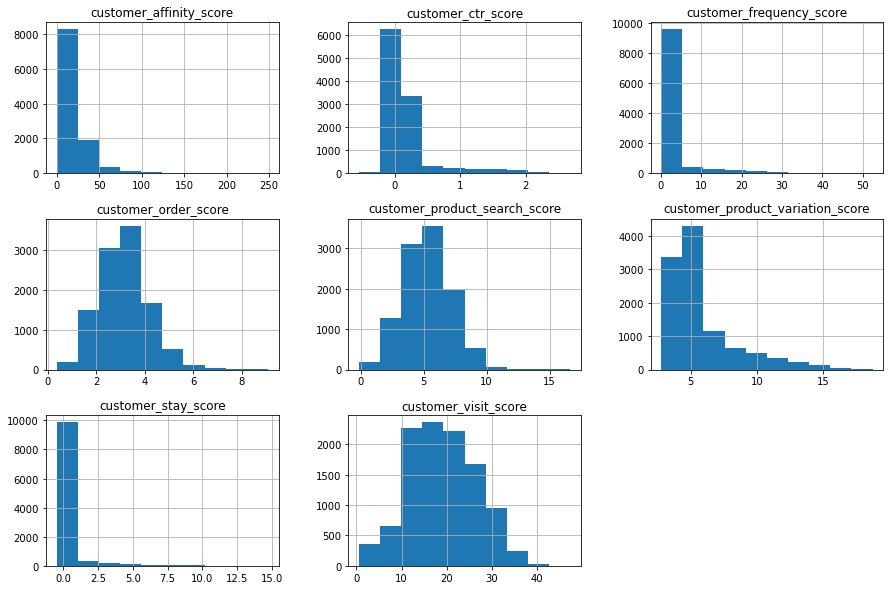

In [27]:
train_df[continuous_var].hist(figsize = (15,10))
plt.show()

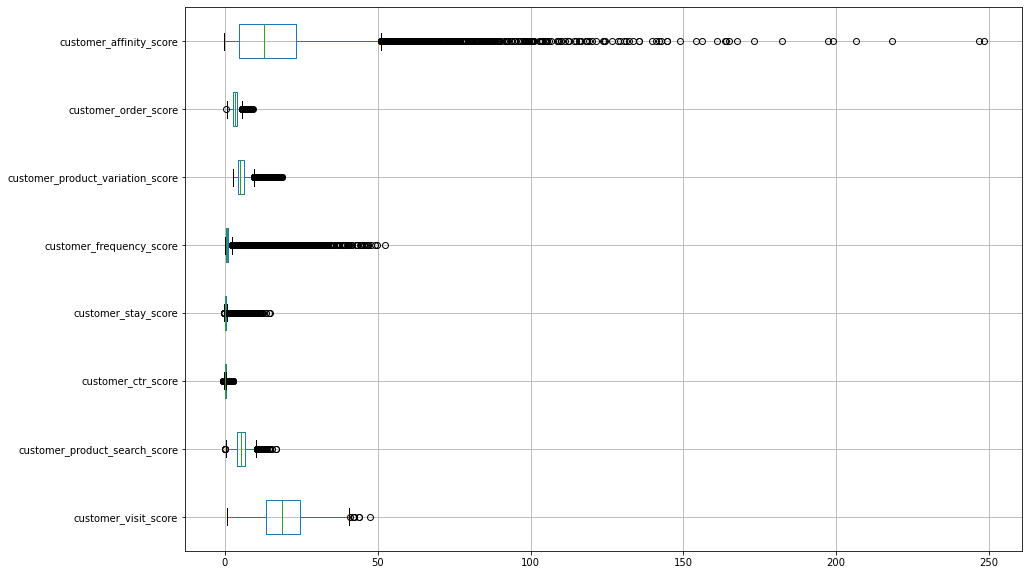

In [28]:
train_df.boxplot(column = continuous_var, figsize = (15,10), vert=False)
plt.show()

In [29]:
for i in continuous_var:
    print(i,'train :',train_df[i].skew())
    print(i,'test :',test_df[i].skew())

customer_visit_score train : 0.10144779244628643
customer_visit_score test : 0.2023781511703525
customer_product_search_score train : 0.28983887368189504
customer_product_search_score test : 0.17767529679402905
customer_ctr_score train : 3.2160210487078347
customer_ctr_score test : 4.634144170806477
customer_stay_score train : 5.018186864153275
customer_stay_score test : 7.70241162217374
customer_frequency_score train : 4.083012881711489
customer_frequency_score test : 4.609428404998498
customer_product_variation_score train : 1.8585478592287294
customer_product_variation_score test : 2.3205749475741424
customer_order_score train : 0.5786454318662213
customer_order_score test : 0.7471594384289899
customer_affinity_score train : 2.993483837481329
customer_affinity_score test : 2.82179866839603


Seems like few columns are highly skwed. Tried 'Yeo-Johnson' to deal with outliers.

In [30]:
from scipy import stats

for i in ['customer_ctr_score','customer_stay_score','customer_frequency_score','customer_product_variation_score','customer_affinity_score']:
    train_df[i] = stats.yeojohnson(train_df[i])[0]
    test_df[i] = stats.yeojohnson(test_df[i])[0]
    print(i,':',train_df[i].skew())

customer_ctr_score : -0.7053518183270137
customer_stay_score : 0.37447183258450323
customer_frequency_score : 0.5875900494477059
customer_product_variation_score : 0.16491344324735413
customer_affinity_score : -0.0423355938521118


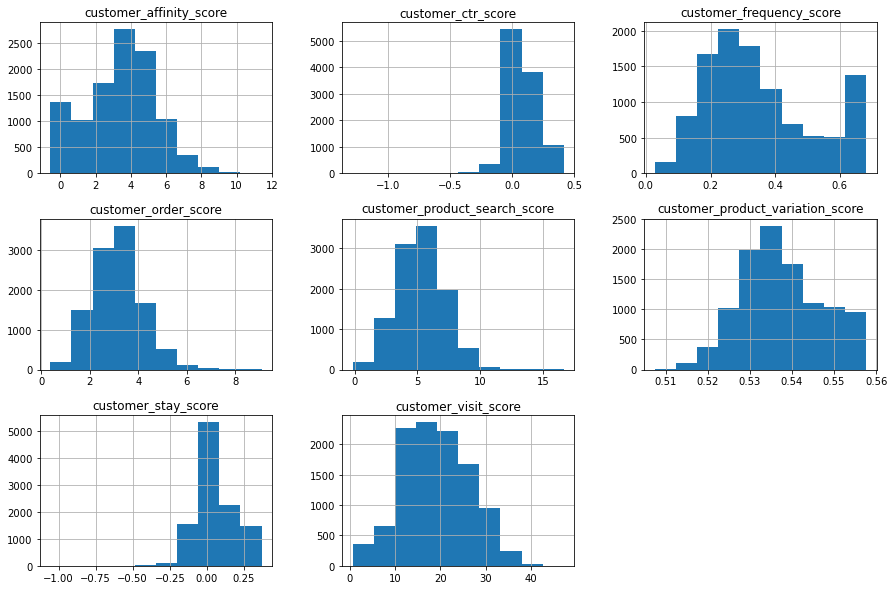

In [31]:
train_df[continuous_var].hist(figsize = (15,10))
plt.show()

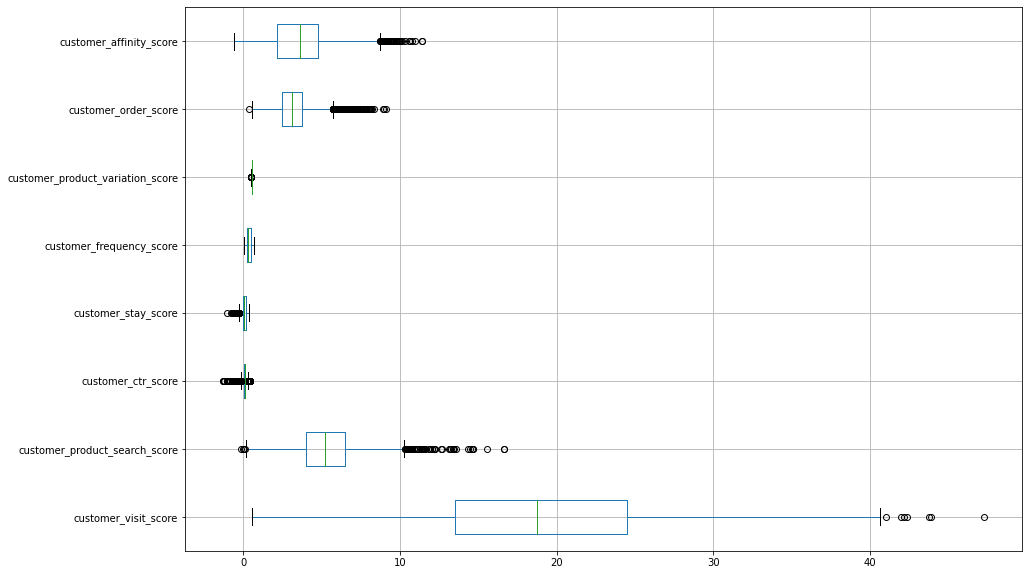

In [32]:
train_df.boxplot(column = continuous_var, figsize = (15,10), vert=False)
plt.show()

Dealing with skweness has helped dealing with Outliers.

### Statistical Test

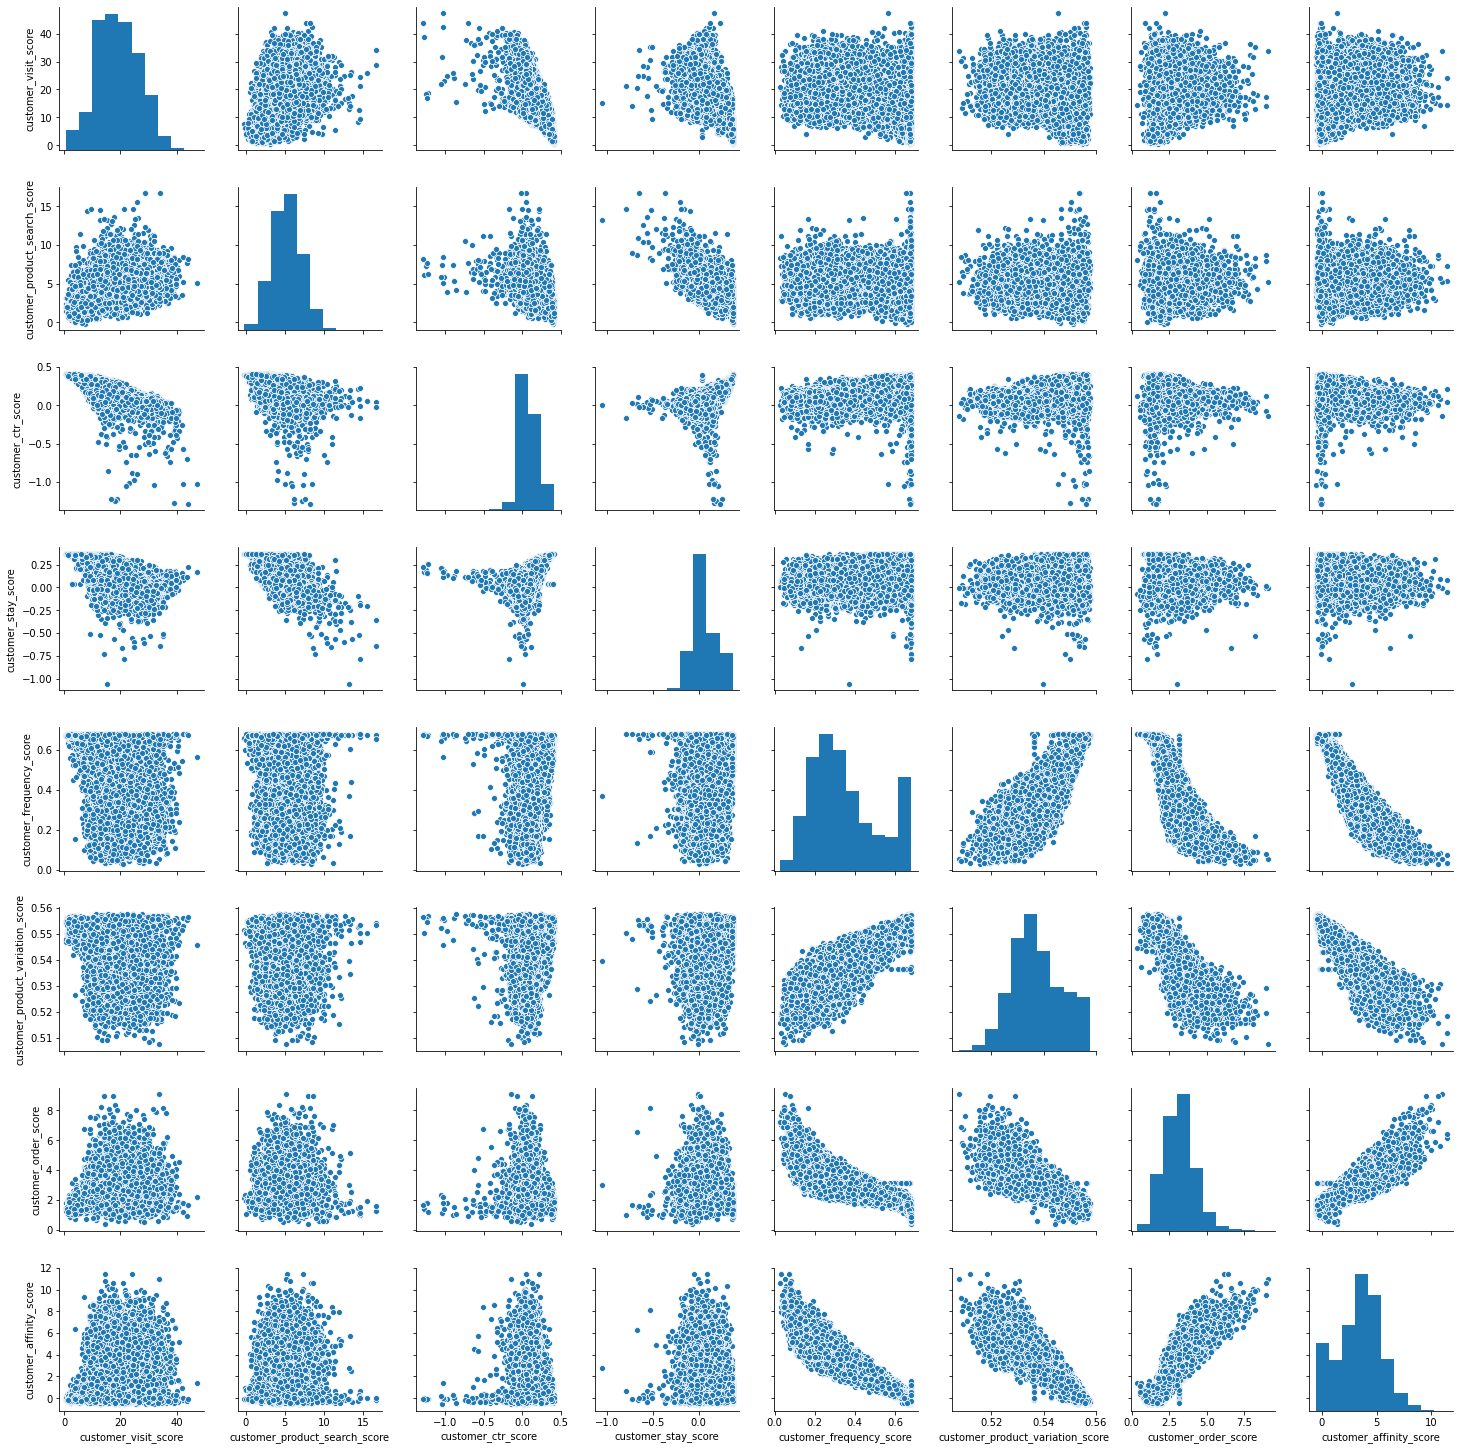

In [33]:
sns.pairplot(train_df[continuous_var])
plt.show()

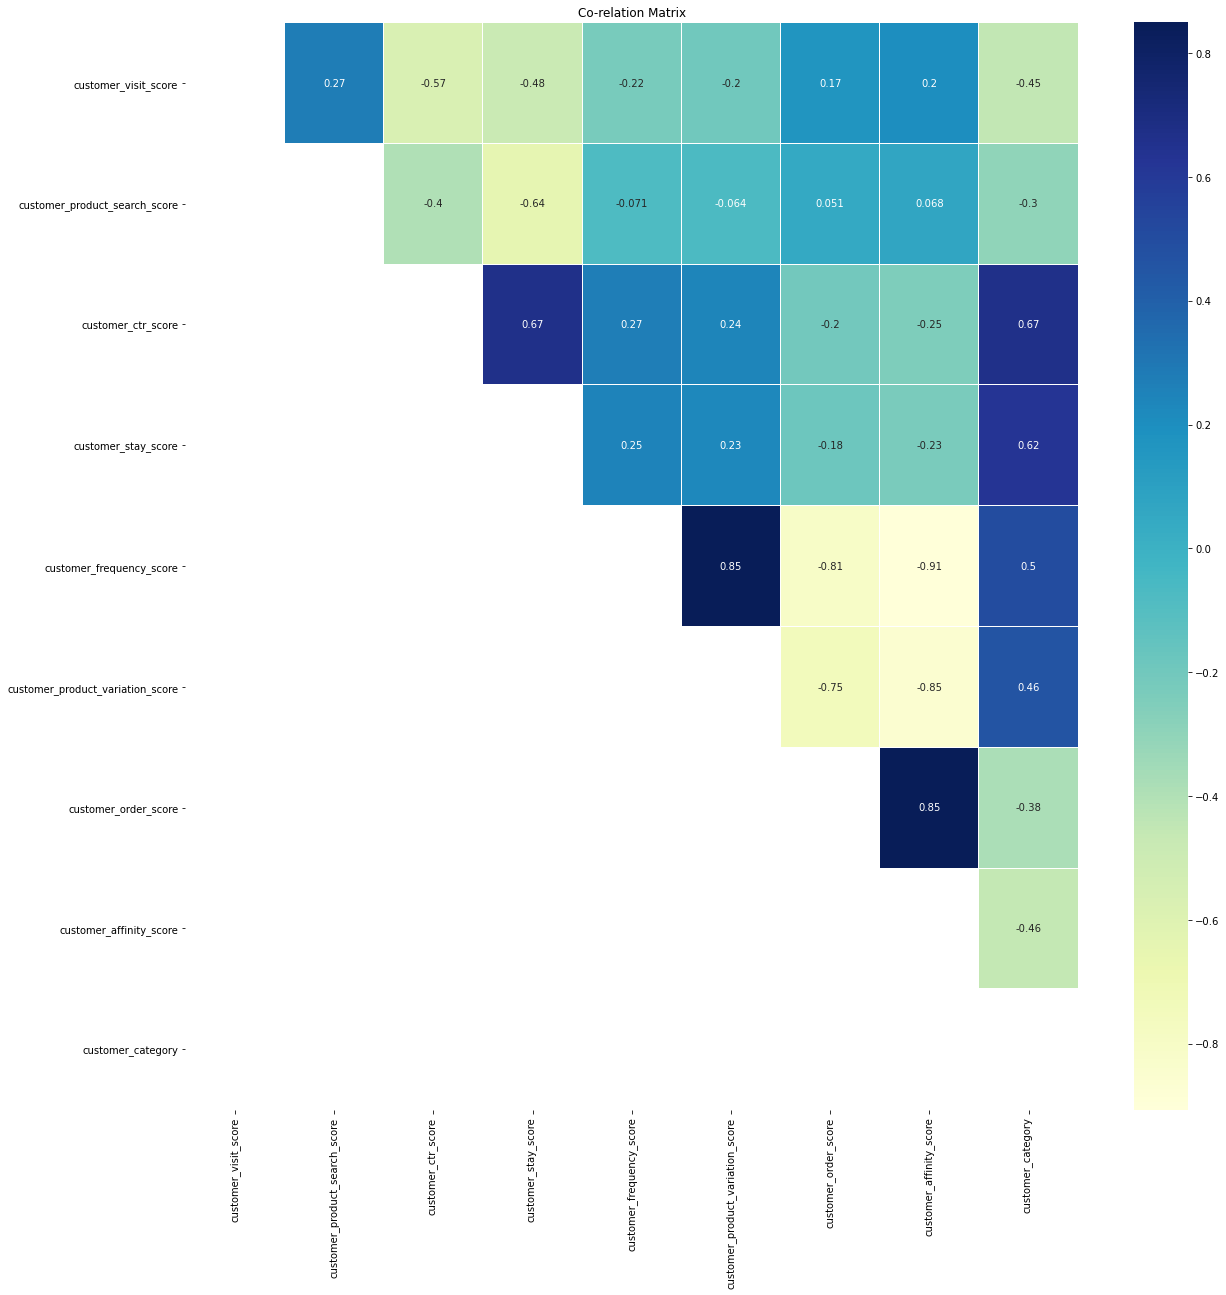

In [34]:
#create the correlation matrix heat map

corr_matrix = train_df.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

plt.figure(figsize=(20,20))
sns.heatmap(upper,linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)
plt.title('Co-relation Matrix')
plt.show()

In [35]:
upper = upper.abs()
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]
to_drop

['customer_affinity_score']

In [36]:
#ANOVA Test
from sklearn import feature_selection

feature_sel =  pd.DataFrame()
feature_sel['Feature Name'] = continuous_var
feature_sel['f_score'] = feature_selection.f_classif(train_df[continuous_var],train_df['customer_category'])[0]
feature_sel['p-value'] = feature_selection.f_classif(train_df[continuous_var],train_df['customer_category'])[1]

In [37]:
# Chi Square Test
from scipy.stats import chi2_contingency

#Testing the relationship
for i in cat_var:
    chi_res = chi2_contingency(pd.crosstab(train_df[i], train_df['customer_category']))
    #print('Chi2 Statistic for {}: {}, p-value: {}'.format(i,chi_res[0], chi_res[1]))
    feature_sel = feature_sel.append({'Feature Name': i,'f_score':chi_res[0],'p-value':chi_res[1]}, ignore_index=True)

In [38]:
#Check for any p-value is greater than 0.05 and disproving Null Hypothesis

feature_sel[feature_sel['p-value']>0.05]

,Feature Name,f_score,p-value


## Preprocessing

One Hot Encoding for categorical variables.

Scaling for continuous variables.

In [39]:
train_enc = train_df.copy()
test_enc = test_df.copy()

In [40]:
#One hot encoding
for col in cat_var:
    train_enc = pd.concat([train_enc.drop(col, axis = 1),pd.get_dummies(train_enc[col],prefix = col)],axis = 1)
    test_enc = pd.concat([test_enc.drop(col, axis = 1),pd.get_dummies(test_enc[col],prefix = col)],axis = 1)

print(train_enc.columns)

Index(['customer_visit_score', 'customer_product_search_score',
       'customer_ctr_score', 'customer_stay_score', 'customer_frequency_score',
       'customer_product_variation_score', 'customer_order_score',
       'customer_affinity_score', 'customer_category',
       'customer_active_segment_A', 'customer_active_segment_AA',
       'customer_active_segment_B', 'customer_active_segment_C',
       'customer_active_segment_D', 'X1_A', 'X1_AA', 'X1_BA', 'X1_E', 'X1_F'],
      dtype='object')


In [41]:
#Scaling
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
train_enc[continuous_var] = scale.fit_transform(train_enc[continuous_var])
test_enc[continuous_var] = scale.transform(test_enc[continuous_var])

In [42]:
#train test split
from sklearn.model_selection import train_test_split

X = train_enc.drop(['customer_category'],axis = 1)
test_X = test_enc.copy()
y = train_enc['customer_category']

feature_lst = X.columns
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size = 0.30,random_state = 46)

## Modelling

To deal with imbalance data, folloing techniques are used:
    
    1. Class Weight
    2. Under Sampling: Random
    3. Over Sampling: SMOTE

In [43]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(y), y)
print(np.unique(y),weights)

[False  True] [0.56856931 4.14594595]


C:\Users\sanja\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass classes=[False  True], y=0        False
1        False
2        False
3        False
4        False
         ...  
10733    False
10734    False
10735    False
10736    False
10737    False
Name: customer_category, Length: 10738, dtype: bool as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [44]:
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [45]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [46]:
score_df = pd.DataFrame(columns = ['Algorithm','Type','Train_Score','Test_Score'])

In [47]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score

def cross_validate(model,X,y):
    
    scr = []
    kfold = KFold(3, shuffle = True,random_state = 40)
    # enumerate splits
    for train, test in kfold.split(X):
        X_train, X_test = X.iloc[train], X.iloc[test]
        y_train, y_test = y.iloc[train], y.iloc[test]
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        scr.append(precision_score(y_test, y_pred, average='macro'))
        
    print('Train Score: ',np.mean(scr))
    
    try:
        y_pred = model.predict(X_val)
        val_scr = precision_score(y_val, y_pred, average='macro')
        print('Test Score: ',val_scr)
        
    except:
        y_pred = model.predict(X_val.drop('customer_affinity_score',axis = 1))
        val_scr = precision_score(y_val, y_pred, average='macro')
        print('Test Score: ',val_scr)
    return np.mean(scr),val_scr

Following Classification Models are employed:
    
    * Logistic Regression
    * Decision Tree
    * Random Forest (Bagging)
    * XGBoost (Boosting)
    * Support Vector Machine
    * Knn (n is between 2 to 8)

In [48]:
#Logistic Regression, removed 'customer_affinity_score' column is highly correlated with 'customer_frequency_score' hence it's dropped

from sklearn.linear_model import LogisticRegression

algo = 'Logistic Regression'

print('Normal')
LogReg = LogisticRegression()
tr_scr, tst_scr = cross_validate(LogReg,X_train.drop('customer_affinity_score',axis = 1),y_train)
score_df = score_df.append({'Algorithm':algo,'Type':'Normal','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)


print('Class Weight')
LogRegCW = LogisticRegression(class_weight={True:4.1,False:0.6},max_iter = 200)
tr_scr, tst_scr = cross_validate(LogRegCW,X_train.drop('customer_affinity_score',axis = 1),y_train)
score_df = score_df.append({'Algorithm':algo,'Type':'Class Weight','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

print('Random Under Sampling')
LogRegRUS = LogisticRegression(max_iter = 200)
tr_scr, tst_scr = cross_validate(LogRegRUS,X_rus.drop('customer_affinity_score',axis = 1),y_rus)
score_df = score_df.append({'Algorithm':algo,'Type':'Random Under Sampling','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

print('SMOTE')
LogRegSM = LogisticRegression(max_iter = 200)
tr_scr, tst_scr = cross_validate(LogRegRUS,X_sm.drop('customer_affinity_score',axis = 1),y_sm)
score_df = score_df.append({'Algorithm':algo,'Type':'SMOTE','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

Normal
Train Score:  0.9610597447055765
Test Score:  0.9648827851785154
Class Weight
Train Score:  0.882972830097828
Test Score:  0.8813184763189427
Random Under Sampling
Train Score:  0.9390291803267287
Test Score:  0.8754644090532755
SMOTE
Train Score:  0.9480277051378088
Test Score:  0.8883468944338122


In [49]:
from sklearn.tree import DecisionTreeClassifier

algo = 'Decision Tree'

print('Normal')
DTClf = DecisionTreeClassifier()
tr_scr, tst_scr = cross_validate(DTClf,X_train,y_train)
score_df = score_df = score_df.append({'Algorithm':algo,'Type':'Normal','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

print('Class Weight')
DTClfCW = DecisionTreeClassifier(class_weight={True:4.1,False:0.6})
tr_scr, tst_scr = cross_validate(DTClfCW,X_train,y_train)
score_df = score_df = score_df.append({'Algorithm':algo,'Type':'Class Weight','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

print('Random Under Sampling')
DTClfRUS = DecisionTreeClassifier()
tr_scr, tst_scr = cross_validate(DTClfRUS,X_rus,y_rus)
score_df = score_df = score_df.append({'Algorithm':algo,'Type':'Random Under Sampling','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

print('SMOTE')
DTClfSM = DecisionTreeClassifier()
tr_scr, tst_scr = cross_validate(DTClfSM,X_sm,y_sm)
score_df = score_df = score_df.append({'Algorithm':algo,'Type':'SMOTE','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

Normal
Train Score:  0.9050349284390663
Test Score:  0.913460807785799
Class Weight
Train Score:  0.8993203314001509
Test Score:  0.9013127931411952
Random Under Sampling
Train Score:  0.8993921511892656
Test Score:  0.7690280635477451
SMOTE
Train Score:  0.9480328821306548
Test Score:  0.826790055693176


In [50]:
from sklearn.ensemble import RandomForestClassifier

algo = 'Random Forest Classifier'

print('Normal')
RFClf = RandomForestClassifier()
tr_scr, tst_scr = cross_validate(RFClf,X_train,y_train)
score_df = score_df.append({'Algorithm':algo,'Type':'Normal','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

print('Class Weight')
RFClfCW = RandomForestClassifier(class_weight={True:4.1,False:0.6})
tr_scr, tst_scr = cross_validate(RFClfCW,X_train,y_train)
score_df = score_df.append({'Algorithm':algo,'Type':'Class Weight','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

print('Random Under Sampling')
RFClfRUS = RandomForestClassifier()
tr_scr, tst_scr = cross_validate(RFClfRUS,X_rus,y_rus)
score_df = score_df.append({'Algorithm':algo,'Type':'Random Under Sampling','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

print('SMOTE')
RFClfSM = RandomForestClassifier()
tr_scr, tst_scr = cross_validate(RFClfSM,X_sm,y_sm)
score_df = score_df.append({'Algorithm':algo,'Type':'SMOTE','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

Normal
Train Score:  0.9647319830461741
Test Score:  0.9631077763699715
Class Weight
Train Score:  0.9646304369733562
Test Score:  0.9621337556691383
Random Under Sampling
Train Score:  0.9395531610034893
Test Score:  0.8949811191770566
SMOTE
Train Score:  0.9732958285520866
Test Score:  0.9332496943961912


In [51]:
from xgboost import XGBClassifier

algo = 'XG Boost'

print('Normal')
XGBClf = XGBClassifier()
tr_scr, tst_scr = cross_validate(XGBClf,X_train,y_train)
score_df = score_df.append({'Algorithm':algo,'Type':'Normal','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

print('Random Under Sampling')
XGBClfRUS = XGBClassifier()
tr_scr, tst_scr = cross_validate(XGBClfRUS,X_rus,y_rus)
score_df = score_df.append({'Algorithm':algo,'Type':'Random Under Sampling','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

print('SMOTE')
XGBClfSM = XGBClassifier()
tr_scr, tst_scr = cross_validate(XGBClfSM,X_sm,y_sm)
score_df = score_df.append({'Algorithm':algo,'Type':'SMOTE','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

Normal
Train Score:  0.9585379530830034
Test Score:  0.9601691225042137
Random Under Sampling
Train Score:  0.9314334899498645
Test Score:  0.8550170749266239
SMOTE
Train Score:  0.9734946059065029
Test Score:  0.9101926766560363


In [52]:
from sklearn.svm import SVC

algo = 'SVM'

print('Normal')
SVMClf = SVC()
tr_scr, tst_scr = cross_validate(SVMClf,X_train,y_train)
score_df = score_df.append({'Algorithm':algo,'Type':'Normal','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

print('Class Weight')
SVMClfCW = SVC(class_weight={True:4.1,False:0.6})
tr_scr, tst_scr = cross_validate(SVMClfCW,X_train,y_train)
score_df = score_df.append({'Algorithm':algo,'Type':'Class Weight','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

print('Random Under Sampling')
SVMClfRUS = SVC()
tr_scr, tst_scr = cross_validate(SVMClfRUS,X_rus,y_rus)
score_df = score_df.append({'Algorithm':algo,'Type':'Random Under Sampling','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

print('SMOTE')
SVMClfSM = SVC()
tr_scr, tst_scr = cross_validate(SVMClfSM,X_sm,y_sm)
score_df = score_df.append({'Algorithm':algo,'Type':'SMOTE','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

Normal
Train Score:  0.9636882907320409
Test Score:  0.9634587908723518
Class Weight
Train Score:  0.9227381591573787
Test Score:  0.919172807570271
Random Under Sampling
Train Score:  0.9410330945801771
Test Score:  0.9051199658138278
SMOTE
Train Score:  0.9517669705397941
Test Score:  0.9156805770863682


In [53]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(2,8):
    algo = 'KNN '+str(i)
    
    KNNClf = KNeighborsClassifier(n_neighbors=i)
    print('Normal',i)
    tr_scr, tst_scr = cross_validate(KNNClf,X_train,y_train)
    score_df = score_df.append({'Algorithm':algo,'Type':'Normal','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)
    
    KNNClfRUS = KNeighborsClassifier(n_neighbors=i)
    print('Random Under Sampling',i)
    tr_scr, tst_scr = cross_validate(KNNClfRUS, X_rus, y_rus)
    score_df = score_df.append({'Algorithm':algo,'Type':'Random Under Sampling','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)
    
    KNNClfSM = KNeighborsClassifier(n_neighbors=i)
    print('SMOTE',i)
    tr_scr, tst_scr = cross_validate(KNNClfSM, X_sm, y_sm)
    score_df = score_df.append({'Algorithm':algo,'Type':'SMOTE','Train_Score':tr_scr,'Test_Score':tst_scr},ignore_index=True)

Normal 2
Train Score:  0.9607212101892609
Test Score:  0.9582965080624797
Random Under Sampling 2
Train Score:  0.9182339300174412
Test Score:  0.8872337876265928
SMOTE 2
Train Score:  0.9751668298409157
Test Score:  0.8840332722938189
Normal 3
Train Score:  0.9527618872311013
Test Score:  0.9385813768404297
Random Under Sampling 3
Train Score:  0.9184027119271959
Test Score:  0.8307471264367816
SMOTE 3
Train Score:  0.9674770891631305
Test Score:  0.8388074300745431
Normal 4
Train Score:  0.9615285885781996
Test Score:  0.9593646576111972
Random Under Sampling 4
Train Score:  0.9263723235573038
Test Score:  0.8852011063070642
SMOTE 4
Train Score:  0.9701452002906028
Test Score:  0.8714224559686888
Normal 5
Train Score:  0.9570604814472382
Test Score:  0.9492141812865498
Random Under Sampling 5
Train Score:  0.9269795048039521
Test Score:  0.8561413669331215
SMOTE 5
Train Score:  0.9643109160657003
Test Score:  0.8368291838148405
Normal 6
Train Score:  0.9634222734622213
Test Score:  0

In [54]:
score_df[score_df['Test_Score']>0.95]

,Algorithm,Type,Train_Score,Test_Score
0,Logistic Regression,Normal,0.961060,0.964883
8,Random Forest Classifier,Normal,0.964732,0.963108
9,Random Forest Classifier,Class Weight,0.964630,0.962134
12,XG Boost,Normal,0.958538,0.960169
15,SVM,Normal,0.963688,0.963459
19,KNN 2,Normal,0.960721,0.958297
25,KNN 4,Normal,0.961529,0.959365
31,KNN 6,Normal,0.963422,0.955231
34,KNN 7,Normal,0.957437,0.952536


In [55]:
score_df[score_df['Test_Score'] == score_df['Test_Score'].max()]

,Algorithm,Type,Train_Score,Test_Score
0,Logistic Regression,Normal,0.96106,0.964883


In [56]:
score_df.pivot(index = 'Algorithm',columns = 'Type').fillna(0)

Train_Score                                  \
Type                     Class Weight    Normal Random Under Sampling   
Algorithm                                                               
Decision Tree                0.899320  0.905035              0.899392   
KNN 2                        0.000000  0.960721              0.918234   
KNN 3                        0.000000  0.952762              0.918403   
KNN 4                        0.000000  0.961529              0.926372   
KNN 5                        0.000000  0.957060              0.926980   
KNN 6                        0.000000  0.963422              0.930461   
KNN 7                        0.000000  0.957437              0.927673   
Logistic Regression          0.882973  0.961060              0.939029   
Random Forest Classifier     0.964630  0.964732              0.939553   
SVM                          0.922738  0.963688              0.941033   
XG Boost                     0.000000  0.958538              0.931433   

                                     Test_Score            \
Type                         SMOTE Class Weight    Normal   
Algorithm                                                   
Decision Tree             0.948033     0.901313  0.913461   
KNN 2                     0.975167     0.000000  0.958297   
KNN 3                     0.967477     0.000000  0.938581   
KNN 4                     0.970145     0.000000  0.959365   
KNN 5                     0.964311     0.000000  0.949214   
KNN 6                     0.966697     0.000000  0.955231   
KNN 7                     0.964300     0.000000  0.952536   
Logistic Regression       0.948028     0.881318  0.964883   
Random Forest Classifier  0.973296     0.962134  0.963108   
SVM                       0.951767     0.919173  0.963459   
XG Boost                  0.973495     0.000000  0.960169   

                                                          
Type                     Random Under Sampling     SMOTE  
Algorithm                                                 
Decision Tree                         0.769028  0.826790  
KNN 2                                 0.887234  0.884033  
KNN 3                                 0.830747  0.838807  
KNN 4                                 0.885201  0.871422  
KNN 5                                 0.856141  0.836829  
KNN 6                                 0.890558  0.870687  
KNN 7                                 0.866818  0.840560  
Logistic Regression                   0.875464  0.888347  
Random Forest Classifier              0.894981  0.933250  
SVM                                   0.905120  0.915681  
XG Boost                              0.855017  0.910193

In [57]:
LogReg = LogisticRegression()

LogReg.fit(X_train.drop('customer_affinity_score',axis = 1),y_train)
y_pred = LogReg.predict(X_val.drop('customer_affinity_score',axis = 1))

In [58]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_val,y_pred))
print(classification_report(y_val,y_pred))

[[2806   17]
 [  68  331]]
              precision    recall  f1-score   support

       False       0.98      0.99      0.99      2823
        True       0.95      0.83      0.89       399

    accuracy                           0.97      3222
   macro avg       0.96      0.91      0.94      3222
weighted avg       0.97      0.97      0.97      3222



In [59]:
importance = list(LogReg.coef_[0])
features = list(X_train.drop('customer_affinity_score',axis = 1).columns)

for i,v in enumerate(importance):
    print(features[i],'\t:\t',v)

customer_visit_score 	:	 0.17824439140270618
customer_product_search_score 	:	 0.2620993787187613
customer_ctr_score 	:	 3.359360459609683
customer_stay_score 	:	 0.345762124819445
customer_frequency_score 	:	 0.07563637282645018
customer_product_variation_score 	:	 0.7828031960601979
customer_order_score 	:	 -0.02253824923089143
customer_active_segment_A 	:	 0.39714670921220485
customer_active_segment_AA 	:	 -0.21545956415071868
customer_active_segment_B 	:	 -0.09352786339032369
customer_active_segment_C 	:	 0.09340326875076142
customer_active_segment_D 	:	 -0.1765961529746721
X1_A 	:	 -0.4459814929982243
X1_AA 	:	 -0.13787679208351988
X1_BA 	:	 0.036188106651446644
X1_E 	:	 0.603842799396495
X1_F 	:	 -0.05120622351894528


In [60]:
y_pred = LogReg.predict(test_X.drop('customer_affinity_score',axis = 1))
solution_df['customer_category'] = y_pred
solution_df.head()

<ipython-input-60-8df03ad0cedf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solution_df['customer_category'] = y_pred


,customer_id,customer_category
0,csid_10739,False
1,csid_10740,False
2,csid_10741,False
3,csid_10742,False
4,csid_10743,False


In [61]:
solution_df.to_csv('data/my_submission_file.csv', index=False)